# Project: Tmdb data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue in which we are going to explore and get into it to analyse its data and get the most out of it.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
% matplotlib inline

### <em>Question that can analyised from this data set</em>
##### which movies have the most and lowest profit ?
##### which movies have the biggest and lowest budgets ?
##### which movies have the most and the lowest revenu?
##### which movies has the longest and shortest runtime values?
##### what is the average runtime for movies ? 
##### which year has the highest profit of all time ?


<a id='wrangling'></a>
## Data Wrangling
In this section i am going to explore data to make sure that it is smooth for furthur analysis by gathering, assessing, and, cleaning.

### General Properties

In [2]:
tmdb = pd.read_csv('tmdb-movies.csv')
tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning (making the data appropriate to analysis)

In [3]:
#removing unused data to focus on used ones only
columns=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']
tmdb= tmdb.drop(columns,1)
tmdb.head(4)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015


In [4]:
#removing all the duplicates 
tmdb.drop_duplicates(keep ='first', inplace=True)

In [5]:
#removing any values equal to 0 and replacing it with nans
list = ['budget', 'revenue']
tmdb[list] = tmdb[list].replace(0, np.NAN)
#droping those nans and check if they were deleted
tmdb.dropna(subset = list, inplace = True)
tmdb.shape

(3854, 10)

In [6]:
tmdb['runtime'] =tmdb['runtime'].replace(0, np.NAN)

In [7]:
#date format apperance type
tmdb.release_date = pd.to_datetime(tmdb['release_date'])
tmdb.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


In [8]:
tmdb.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [9]:
#fixing the dtypes of certain columns
ch_type=['budget', 'revenue']
tmdb[ch_type]=tmdb[ch_type].applymap(np.int64)
tmdb.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [10]:
#creating a new column to calculate the profit
tmdb.insert(2,'profit',tmdb['revenue']-tmdb['budget'])
tmdb.head(2)

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


## Now we have a cleaned data to be analysed

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (which movies have the most and lowest profit?)

In [11]:
def calculate(column):
    #to calculate the highest profit
    highest= tmdb[column].idxmax()
    highest_details=pd.DataFrame(tmdb.loc[highest])
    
    #to calculate the lowest profit
    lowest= tmdb[column].idxmin()
    lowest_details=pd.DataFrame(tmdb.loc[lowest])
    
    #merging data togather
    information=pd.concat([highest_details, lowest_details], axis=1)
    
    return information

calculate('profit')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


### Research Question 2 (which movies have the biggest and lowest budgets ?)

In [12]:
calculate('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


### Research Question 3 (which movies have the most and the lowest revenu ?)

In [13]:
calculate('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
profit,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


### Research Question 4 (which movies has the longest and shortest runtime values ?)

In [14]:
calculate('runtime')

,2107,5162
budget,18000000,10
revenue,871279,5
profit,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


### Research Question 5 (what is the average runtime for movies ?)

In [15]:
def average_run(column):
    return tmdb[column].mean()

In [16]:
average_run('runtime')

109.22029060716139

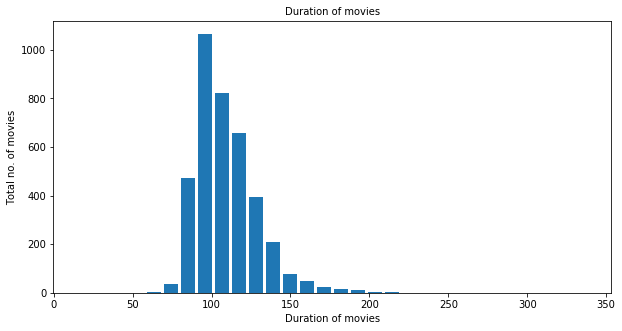

In [17]:
#graphical representation of runtime as a histogram.
plt.figure(figsize=(10,5))
plt.xlabel('Duration of movies', fontsize = 10)
plt.ylabel('Total no. of movies', fontsize=10)
plt.title('Duration of movies', fontsize=10)
plt.hist(tmdb['runtime'], rwidth = 0.85, bins =30)
plt.show()

### the distribution of the graph shows that it is skewed to the right where the movies most runtimes are between 90 to 120 mins where most of the movies fall 

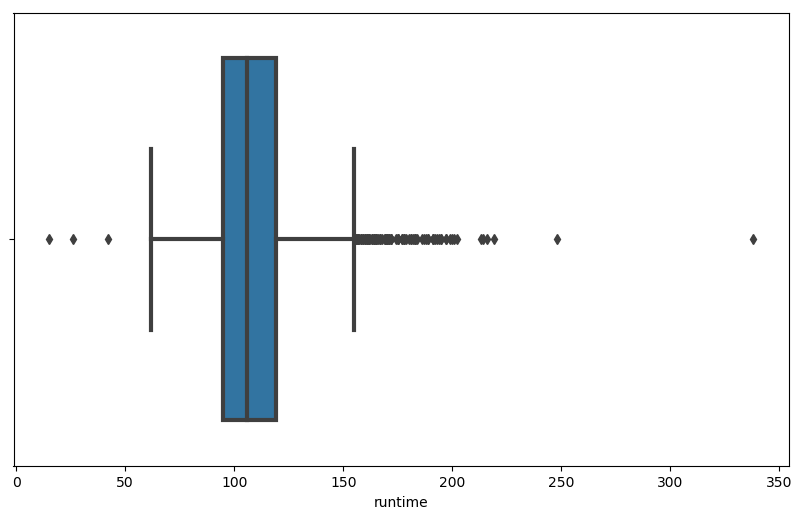

In [18]:
##graphical representation of runtime as a box plot.
plt.figure(figsize=(10,6), dpi = 100)
sns.boxplot(tmdb['runtime'], linewidth = 3)
plt.show()

### gives a general outlook of how the data is distributed which gives more illustration of how the runtime data is going

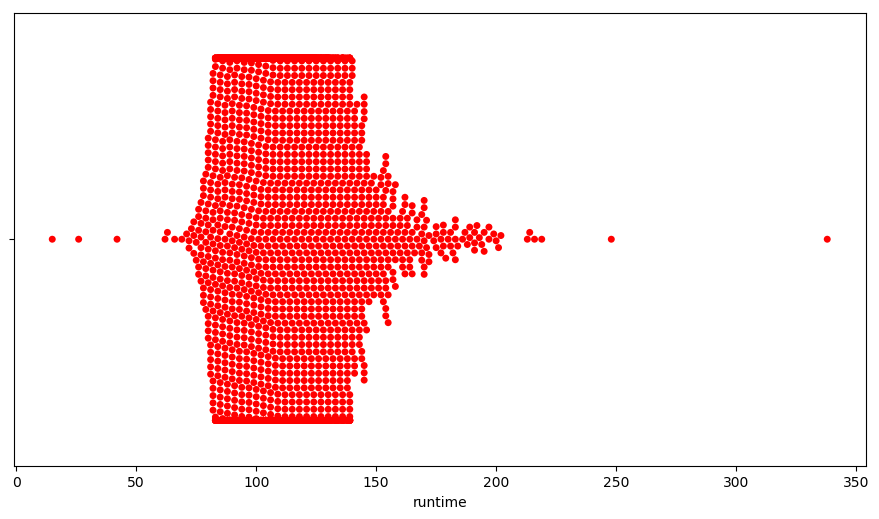

In [19]:
#graphical representation of runtime as a points plot.
plt.figure(figsize=(11,6), dpi = 100)
sns.swarmplot(tmdb['runtime'], color = 'red')
plt.show()

### by looking at the above graph and the rest of the varieties of other plots we can conclude that our conclusion was right and we can aslo make sure by using describe function.

In [20]:
#getting into the runtime data
tmdb['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

## Research Question 6 (which year has the highest profit of all time?)

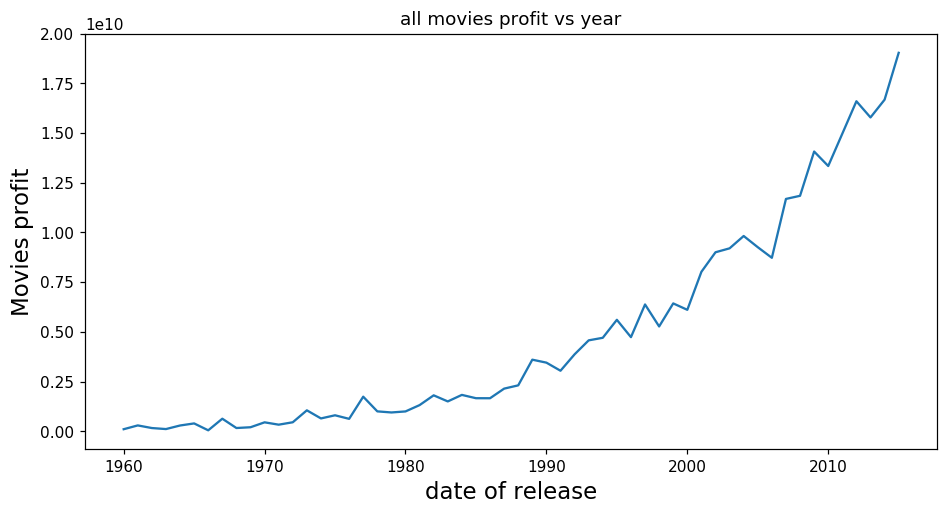

In [21]:
#graphical representation of profit as a line plot.
year = tmdb.groupby('release_year')['profit'].sum()
plt.figure(figsize=(10,5), dpi = 110)
plt.xlabel('date of release', fontsize = 15)
plt.ylabel('Movies profit', fontsize = 15)
plt.title('all movies profit vs year')
plt.plot(year)
plt.show()

### so after doing this plotting w observe that 2015 was the year of the most profit of all time where the line plot shows all the ups and downs since 1960 so this means that by the time they gain experience and attract more audience.

In [22]:
#to get the highest year
year.idxmax()

2015

<a id='conclusions'></a>
## Conclusions

> Finally, after anlysing the data we have got that the most profitable year is 2015 where the movies profit compared to other years is the highest from 1960 till 2016 <
> the highest profit was 2544505847 for Avatar and the lowest was -413912431 for the warriors way <
> the highest budget is for the warriors way with 4.25e+08 and the lowest was 1 for the movie lost and found <
> the highest revenue was for Avatar 2.78151e+09  and the lowest is for the shattered glass movie with 2 <
> the most runtime is 338 mins for the movies carlos and the least for the kids story movie with 15 mins <

## limitaion 
>this analysis is great for knowing the data itself but it isn't the correct way to measure the profit as there are two factors affecting the profit the first one is population where as long as the population increased the number of people watching the movies will increase also the value of money was different than the recent times so it is difficult to compare a movie from nowdays with a movies from the 60s or 70s.


